In [84]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [85]:
filename = 'Catchment water balance data.csv'

Water_balance = pd.read_csv(filename, skiprows=2, index_col=[0], parse_dates=True, sep=';')
Water_balance.columns = ['P_1', 'EP_1', 'Q_1', 'P_2', 'EP_2', 'Q_2', 'P_3', 'EP_3', 'Q_3'] 
for col in Water_balance.columns[0:]: 
    Water_balance[col] = Water_balance[col].str.replace(',', '.').astype(float)
Water_balance.head(10)

,P_1,EP_1,Q_1,P_2,EP_2,Q_2,P_3,EP_3,Q_3
02/10/2001,2.5,1.1,0.10,1.75,1.54,0.10,1.25,2.09,0.10
03/10/2001,0.0,1.4,0.29,0.00,1.96,0.29,0.00,2.66,0.29
04/10/2001,0.5,0.9,0.08,0.35,1.26,0.08,0.25,1.71,0.08
05/10/2001,3.5,0.7,0.06,2.45,0.98,0.06,1.75,1.33,0.06
06/10/2001,7.0,1.4,0.06,4.90,1.96,0.06,3.50,2.66,0.06
07/10/2001,15.5,0.7,0.10,10.85,0.98,0.10,7.75,1.33,0.10
08/10/2001,1.5,1.4,0.46,1.05,1.96,0.46,0.75,2.66,0.46
09/10/2001,0.5,1.1,0.21,0.35,1.54,0.21,0.25,2.09,0.21
10/10/2001,0.0,1.1,0.13,0.00,1.54,0.13,0.00,2.09,0.13
11/10/2001,0.0,1.0,0.07,0.00,1.40,0.07,0.00,1.90,0.07


In [88]:

EP1_mean = Water_balance['EP_1'].mean()
EP2_mean = Water_balance['EP_2'].mean()
EP3_mean = Water_balance['EP_3'].mean()

P1_mean = Water_balance['P_1'].mean()
P2_mean = Water_balance['P_2'].mean()
P3_mean = Water_balance['P_3'].mean()

Q1_mean = Water_balance['Q_1'].mean()
Q2_mean = Water_balance['Q_2'].mean()
Q3_mean = Water_balance['Q_3'].mean()

EP1_P1 = EP1_mean/P1_mean
EP2_P2 = EP2_mean/P2_mean
EP3_P3 = EP3_mean/P3_mean

EA1_P1 = 1- Q1_mean/P1_mean
EA2_P2 = 1- Q2_mean/P2_mean
EA3_P3 = 1- Q3_mean/P3_mean

In [89]:
EA1_P1_Bud = (EP1_mean/P1_mean*np.tanh(1/(EP1_mean/P1_mean))*(1-np.exp(-EP1_mean/P1_mean)))**(0.5)
EA2_P2_Bud = (EP2_mean/P2_mean*np.tanh(1/(EP2_mean/P2_mean))*(1-np.exp(-EP2_mean/P2_mean)))**(0.5)
EA3_P3_Bud = (EP3_mean/P3_mean*np.tanh(1/(EP3_mean/P3_mean))*(1-np.exp(-EP3_mean/P3_mean)))**(0.5)

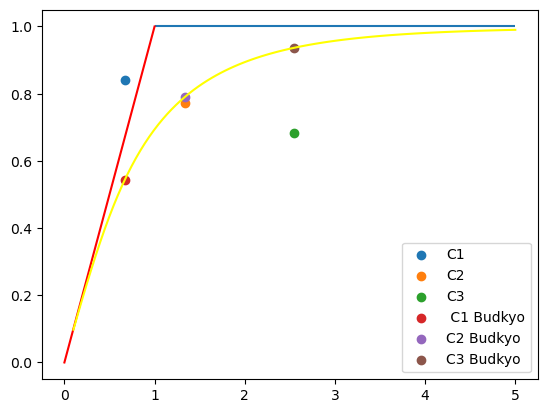

In [92]:
x = np.linspace(0,1,100)

EP_P = np.linspace(0.1,5,100)
EA_P_Bud = (EP_P*np.tanh(1/(EP_P))*(1-np.exp(-EP_P)))**(0.5)

plt.scatter(EP1_P1, EA1_P1, label = 'C1')
plt.scatter(EP2_P2 , EA2_P2, label = 'C2')
plt.scatter(EP3_P3 , EA3_P3, label = 'C3')
plt.scatter(EP1_P1, EA1_P1_Bud, label = ' C1 Budkyo')
plt.scatter(EP2_P2 , EA2_P2_Bud, label = 'C2 Budkyo')
plt.scatter(EP3_P3 , EA3_P3_Bud, label = 'C3 Budkyo')
plt.hlines(y = 1, xmin= 1, xmax= 5)
plt.plot(x,x, color ='red')
plt.plot(EP_P, EA_P_Bud, color= 'yellow')
plt.legend()
plt.show()

In [93]:
EA1 = EA1_P1_Bud*P1_mean
EA2 = EA2_P2_Bud*P2_mean
EA3 = EA3_P3_Bud*P3_mean

Water_balance_C1 = P1_mean - EA1 - Q1_mean
Water_balance_C2 = P2_mean - EA2 - Q2_mean
Water_balance_C3 = P3_mean- EA3 - Q3_mean

print(Water_balance_C1)
print(Water_balance_C2)
print(Water_balance_C3)

0.8436213305608434
-0.035670455487957775
-0.3602348209317564
